## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('./2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.
#contrib.head(10)

C:\Users\jspen\AppData\Local\Temp\ipykernel_15936\203058691.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('./2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

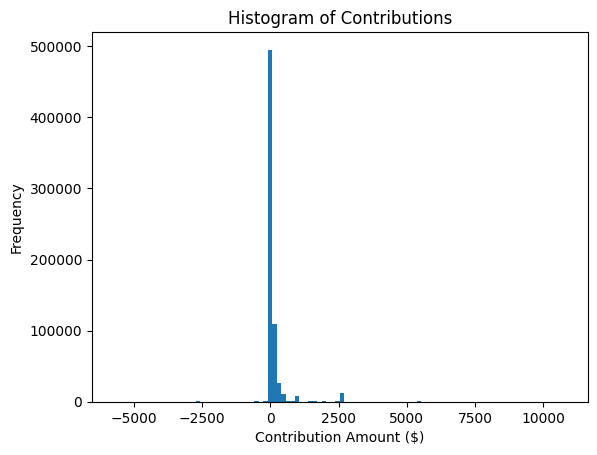

In [2]:
# 1a YOUR CODE HERE
plt.hist(contrib['contb_receipt_amt'], bins=100)
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Contributions')
plt.show()

- **1a answer here:** 
While there is a large range for overall contribution amount, the overwhelming majority contributions are 'small-dollar' and fall well below 500$.

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

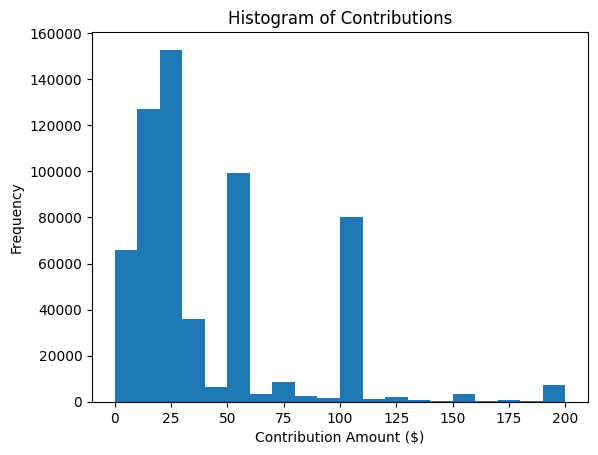

In [9]:
# 1b YOUR CODE HERE
plt.hist(contrib['contb_receipt_amt'], bins=20, range=(0,200))
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Contributions')
plt.show()

- **1b answer here:** 
It is clear from the initial histogram that the vast majority of donations are well under 1000$, with a huge spike near close to 0$ and much smaller spikes around 1000$ and 2500$.  By looking more closely at the small-dollar contributions, it appears that the bulk of the distribution indicates contributions at or under 25$.  Furthermore, there appear to be large peaks at 10$, 25$, 50$, and 100$, with smaller peaks at 75$, 125$, 150$, and 200$, indicating a preference for contributions at approximately 25$ increments above 25$.

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

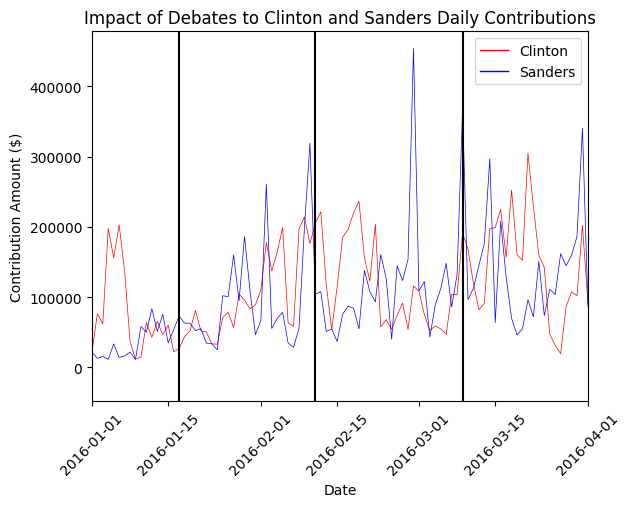

In [10]:
# 1c YOUR CODE HERE
from matplotlib.lines import Line2D
clinton_donations = contrib[contrib['cand_nm']=='Clinton, Hillary Rodham'].groupby(['contb_receipt_dt'])['contb_receipt_amt'].sum()
sanders_donations = contrib[contrib['cand_nm']=='Sanders, Bernard'].groupby(['contb_receipt_dt'])['contb_receipt_amt'].sum()
plt.plot( clinton_donations.index, clinton_donations.values, color='red', linewidth=0.5 )
plt.plot( sanders_donations.index, sanders_donations.values, color='blue', linewidth=0.5 )
plt.axvline(datetime(2016, 1, 17), color='black')
plt.axvline(datetime(2016, 2, 11), color='black')
plt.axvline(datetime(2016, 3, 9), color='black')
plt.xlabel('Date')
plt.ylabel('Contribution Amount ($)')
plt.title('Impact of Debates to Clinton and Sanders Daily Contributions')
plt.xlim(datetime(2016,1,1), datetime(2016,4,1))
plt.xticks(rotation=45)
legend_lines = [Line2D([0], [0], color='r', lw=1), Line2D([0], [0], color='b', lw=1)]
plt.legend(legend_lines, ['Clinton', 'Sanders'])
plt.show()

- **1c answer here:** 
The timeseries plot shows an overall general trend that contributions increased with time during the primary season.  There was minimal impact on donations from both candidates during the first debate.  The second debate saw bumps in fundraising for both candidates, with Sanders seeing large pre-debate and small post-debate bumps, and Clinton seeing moderate pre/post-debate bumps.  Both candidates saw a bump during the third debate, but Sanders had a much more significant increase.

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [11]:
# 2a YOUR CODE HERE

grouped_donation_counts = contrib.groupby('cand_nm')['contb_receipt_amt'].count().sort_values(ascending=False)
print(grouped_donation_counts)

cand_nm
Sanders, Bernard             379284
Clinton, Hillary Rodham      171104
Cruz, Rafael Edward 'Ted'     56355
Carson, Benjamin S.           27015
Rubio, Marco                  13267
Fiorina, Carly                 4679
Paul, Rand                     4164
Trump, Donald J.               3806
Bush, Jeb                      3056
Kasich, John R.                2957
Walker, Scott                   666
Huckabee, Mike                  531
O'Malley, Martin Joseph         392
Lessig, Lawrence                353
Christie, Christopher J.        333
Graham, Lindsey O.              305
Stein, Jill                     180
Webb, James Henry Jr.           106
Perry, James R. (Rick)          104
Santorum, Richard J.             85
Johnson, Gary                    68
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: contb_receipt_amt, dtype: int64


- **2a answer here:** 
Sanders, by far, had the largest total number of contributions from California residents during the 2016 primary, with nearly 38k in total.

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [12]:
# 2b YOUR CODE HERE
grouped_donation_sums = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)
print(grouped_donation_sums)

cand_nm
Clinton, Hillary Rodham     38,969,122.68
Sanders, Bernard            19,062,998.80
Cruz, Rafael Edward 'Ted'    5,926,568.27
Rubio, Marco                 4,998,700.92
Bush, Jeb                    3,316,836.83
Carson, Benjamin S.          3,022,105.15
Fiorina, Carly               1,473,989.42
Kasich, John R.              1,471,417.54
Trump, Donald J.               868,672.16
Paul, Rand                     721,563.14
Walker, Scott                  492,706.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             379,495.00
O'Malley, Martin Joseph        297,334.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               148,032.52
Webb, James Henry Jr.           76,568.16
Santorum, Richard J.            36,329.88
Johnson, Gary                   31,787.80
Pataki, George E.               30,450.00
Stein, Jill                     25,841.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

- **2b answer here:** 
Clinton raised the most money overall from California contributers.  Her total fundraising was nearly 39 million dollars, compared to just over 19 million dollars for Sanders.

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [13]:
# 2c YOUR CODE HERE
print(type(grouped_donation_sums))
grouped_donation_stats = pd.merge(grouped_donation_counts, grouped_donation_sums, on='cand_nm')
#grouped_donation_stats.index.names = ['Candidate Name']
grouped_donation_stats.columns = ['Count of Contributions','Sum of Contributions ($)']
print(grouped_donation_stats)

<class 'pandas.core.series.Series'>
                           Count of Contributions  Sum of Contributions ($)
cand_nm                                                                    
Sanders, Bernard                           379284             19,062,998.80
Clinton, Hillary Rodham                    171104             38,969,122.68
Cruz, Rafael Edward 'Ted'                   56355              5,926,568.27
Carson, Benjamin S.                         27015              3,022,105.15
Rubio, Marco                                13267              4,998,700.92
Fiorina, Carly                               4679              1,473,989.42
Paul, Rand                                   4164                721,563.14
Trump, Donald J.                             3806                868,672.16
Bush, Jeb                                    3056              3,316,836.83
Kasich, John R.                              2957              1,471,417.54
Walker, Scott                                 666   

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [14]:
# 2d YOUR CODE HERE
#grouped_donation_means = contrib.groupby('cand_nm')['contb_receipt_amt'].mean()
#grouped_donation_stats.merge(grouped_donation_means, on='cand_nm')
grouped_donation_stats['Average $ per Donation'] = contrib.groupby('cand_nm')['contb_receipt_amt'].mean().to_frame()
grouped_donation_stats.sort_values(by='Average $ per Donation', ascending=False, inplace=True)
print(grouped_donation_stats.head())

                          Count of Contributions  Sum of Contributions ($)  \
cand_nm                                                                      
Gilmore, James S III                           3                  8,100.00   
Perry, James R. (Rick)                       104                208,400.00   
Pataki, George E.                             20                 30,450.00   
Christie, Christopher J.                     333                456,066.00   
Graham, Lindsey O.                           305                379,495.00   

                          Average $ per Donation  
cand_nm                                           
Gilmore, James S III                    2,700.00  
Perry, James R. (Rick)                  2,003.85  
Pataki, George E.                       1,522.50  
Christie, Christopher J.                1,369.57  
Graham, Lindsey O.                      1,244.25  


- **2d answer here:** 
James Gilmore had the highest average donation at 2700$.  This is interesting as I followed the campaign (both primaries) closely and did not recall him.

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

Text(0.5, 1.0, 'Comparison of Total and Mean Donations for 2016 Primaries')

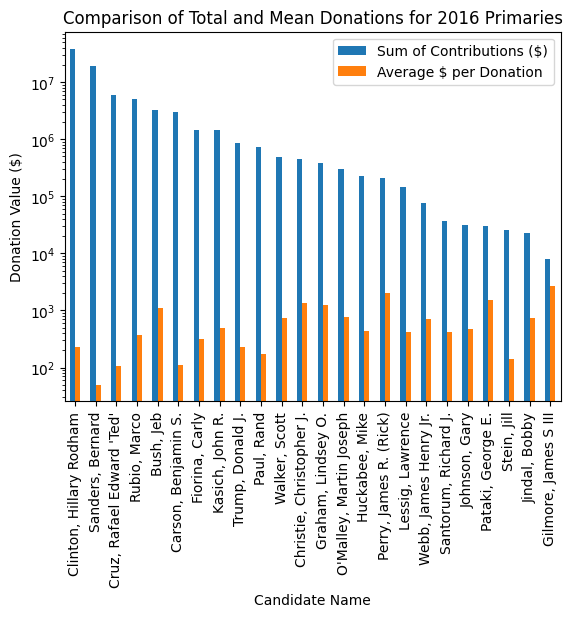

In [15]:
# 2e YOUR CODE HERE
grouped_donation_stats[ ['Sum of Contributions ($)','Average $ per Donation' ]].sort_values(by='Sum of Contributions ($)', ascending=False).plot.bar(logy=True)
plt.ylabel('Donation Value ($)')
plt.xlabel('Candidate Name')
plt.title('Comparison of Total and Mean Donations for 2016 Primaries')

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:**
One-time donations in California were disproportionately small-dollar values, with the vast majority 50$ or less.  Donation of 10,20,25,50,75,100, and 200$ were most common.  Hillary Clinton and Bernie Sanders overwhelmingly received the highest total donations during the 2016 primaries, which is not surprising considering the strong Democratic lean of the state.  Although Clinton raised nearly twice what Sanders did overall, the numbr of Sanders donors was nearly twice the number of Clinton donors.  Based on a timeseries analysis, donations to the Sanders campaign spiked at key points during the campaign, such as during the second and third debates.

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [16]:
# 3a YOUR CODE HERE
clinton_contbr = contrib[ contrib['cand_nm'] == 'Clinton, Hillary Rodham']
print(clinton_contbr['contbr_occupation'].value_counts().sort_values(ascending=False).head())

RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64


**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [17]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    return df['contbr_occupation'].value_counts().sort_values(ascending=False).head()

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [18]:
# 3c YOUR CODE HERE
clinton_contbr = contrib[ contrib['cand_nm'] == 'Clinton, Hillary Rodham']
print('\nTop 5 Occupations for Contributions to Hillary Clinton')
print(get_donors(clinton_contbr))

sanders_contbr = contrib[ contrib['cand_nm'] == 'Sanders, Bernard']
print('\nTop 5 Occupations for Contributions to Bernie Sanders')
print(get_donors(sanders_contbr))

trump_contbr = contrib[ contrib['cand_nm'] == 'Trump, Donald J.']
print('\nTop 5 Occupations for Contributions to Donald Trump')
print(get_donors(trump_contbr))


Top 5 Occupations for Contributions to Hillary Clinton
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64

Top 5 Occupations for Contributions to Bernie Sanders
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: contbr_occupation, dtype: int64

Top 5 Occupations for Contributions to Donald Trump
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: contbr_occupation, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [19]:
# 3d YOUR CODE HERE
contrib.groupby('cand_nm').apply(get_donors)

cand_nm                                                          
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** 
Retirees are typically one of the top-5 occupations for all candidates (and in most cases the top-most occupation).  This should perhaps not be surprising, since a large swathe of the public fall into this category.  Unusually, a large number of donors to Sanders (indeed, the highest) were unemployed.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** 
Clinton had over twice as many retired donors than Sanders.  While Clinton had over 7k attorney donors, Sanders had over 15k engineers/software engineers -- all highly paid professions.

The fact that the top occupation for Sanders donors (unusually) was unemployed largely explains why his overall average donations were significantly less than Clinton's, since unemployed are less likely to have much disposable income.  

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k